<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/01_neural_network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow

In [59]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Create data to view and fit

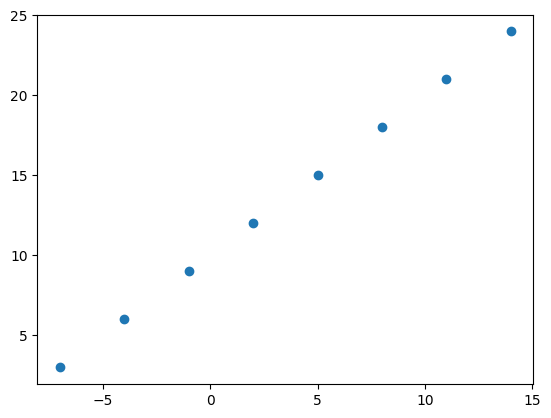

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [61]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [62]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [63]:
input_shape = house_info.shape
output_shape = house_price.shape
input_shape, output_shape

(TensorShape([3]), TensorShape([1]))

In [64]:
# Turn the Numpy array to tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [65]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

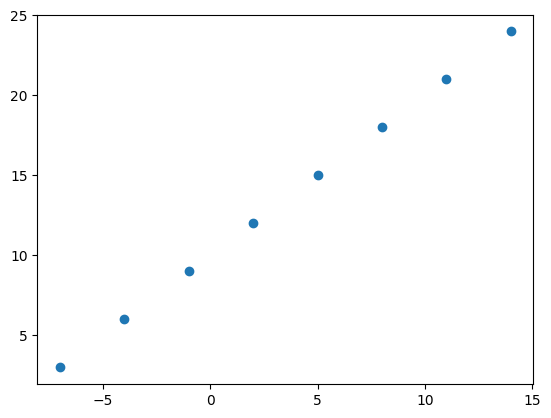

In [66]:
plt.scatter(x, y)

## Step in modelling with tensorflow

1.Create a model
2.Compile the model
3.Fit the model
4.Evaluate the model
5.Improve through experimentation
6.Predict with model

In [67]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is for stochastis gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x,axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.9726 - mae: 17.9726
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 17.6913 - mae: 17.6913
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 17.4101 - mae: 17.4101
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 17.1288 - mae: 17.1288
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 16.8476 - mae: 16.8476


In [68]:
# Look x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [69]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]) )
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[-12.411259]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model - here we might add more layers, increase the number of hidden
units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [70]:
# lets rebuild our model (will train more)

# 1- create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2- Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3- Fit
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step - loss: 7.8528 - mae: 7.8528
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.7203 - mae: 7.7203
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.5878 - mae: 7.5878
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.4438 - mae: 7.4438
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.4381 - mae: 7.4381
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4325 - mae: 7.4325
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/st

In [71]:
# Is our prediction improved ?

model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[29.971958]], dtype=float32)

In [72]:
# lets rebuild our model (will have another hidden layer with 100 hiddent unit)

# 1- create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2- Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3- Fit
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - loss: 13.4468 - mae: 13.4468
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.8039 - mae: 12.8039
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 12.1558 - mae: 12.1558
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.4965 - mae: 11.4965
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.8198 - mae: 10.8198
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10.1194 - mae: 10.1194
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.3919 - mae: 9.3919
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 8.6396 - mae: 8.6396
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.8555 - mae: 7.8555
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.0296 - mae: 7.0296
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 6.1454 - mae: 6.1454
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5.1953 - mae: 5.1953
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

In [73]:
# Is our prediction improved ?

model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[31.432928]], dtype=float32)

In [74]:
# lets rebuild our model (will have another optimiser ADAM and less hidden units)

# 1- create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])


# 2- Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1), #****** Learning rate is very important
              metrics=["mae"])

# 3- Fit
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step - loss: 11.0939 - mae: 11.0939
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.0472 - mae: 4.0472
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.1972 - mae: 7.1972
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.0065 - mae: 6.0065
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.1131 - mae: 4.1131
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.5600 - mae: 4.5600
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.9709 - mae: 4.9709
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.7013 - mae: 3.7013
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.8819 - mae: 2.8819
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.3355 - mae: 3.3355
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.5895 - mae: 2.5895
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.7465 - mae: 1.7465
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/

In [75]:
# Is our prediction improved ?

model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[29.850456]], dtype=float32)

### Evaluating a model

In [76]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [77]:
# Make labels for dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

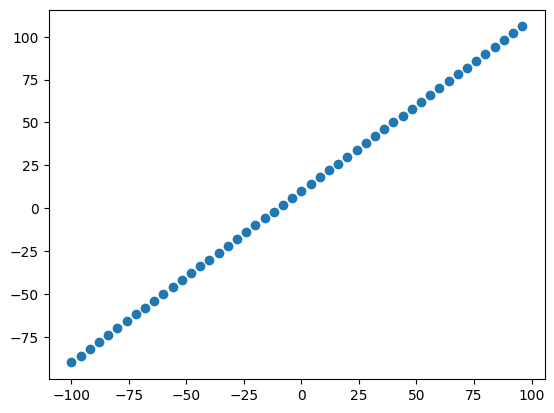

In [78]:
#Visualise the data
plt.scatter(x, y)

### The 3 set of data

* Training set (70-80%)
* Validation set (10-15%)
* Test set (10-15%)

In [79]:
# Check lenght of x
len(x)

50

In [80]:
# Split data into train and test set
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

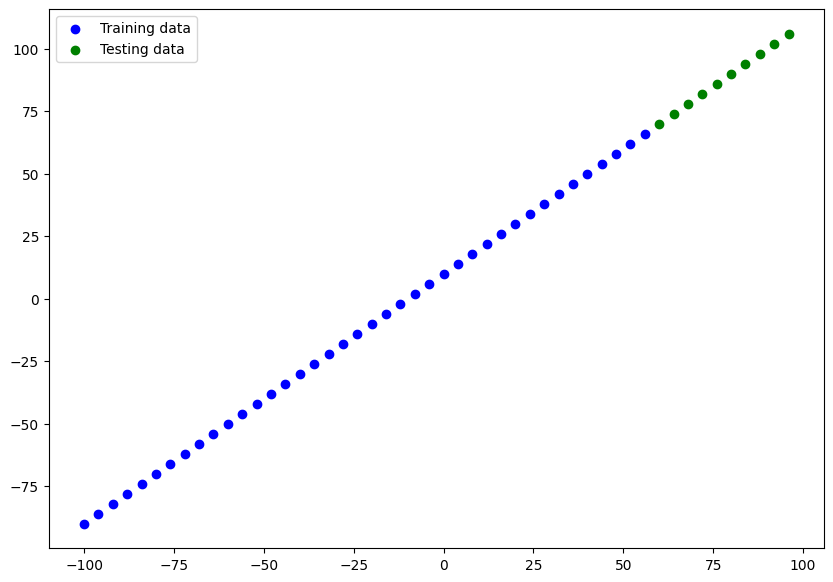

In [81]:
# Plot the training & testing set
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c="b", label="Training data")
plt.scatter(x_test, y_test, c="g", label="Testing data")
plt.legend()


In [82]:
# Build another neural network

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

In [83]:
# Visualize the model

#model.summary() # error because of unbuilt param

In [84]:
# Create a model that build automaticaly by defining the input_shape arg where x[0] & y[0] are scallar

tf.random.set_seed(42)

model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
], name="model_one")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "model_one"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
#Lets fit our model to training data
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100, verbose=0)

In [87]:
# Get summary
model.summary()

Model: "model_one"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

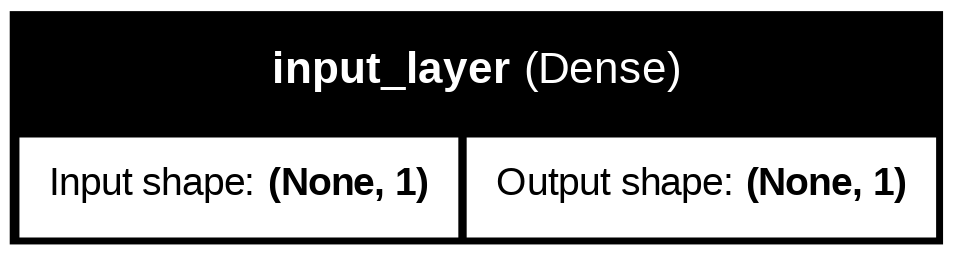

In [88]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True, show_layer_names=True,)

### Visualizing our model's predictions

In [89]:
# Make some predictions
y_preds = model.predict(x_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[49.59186 ],
       [52.806446],
       [56.02103 ],
       [59.23561 ],
       [62.45019 ],
       [65.66477 ],
       [68.87936 ],
       [72.09393 ],
       [75.30852 ],
       [78.5231  ]], dtype=float32)

In [90]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [91]:
# Let's create a ploting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's prediction in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

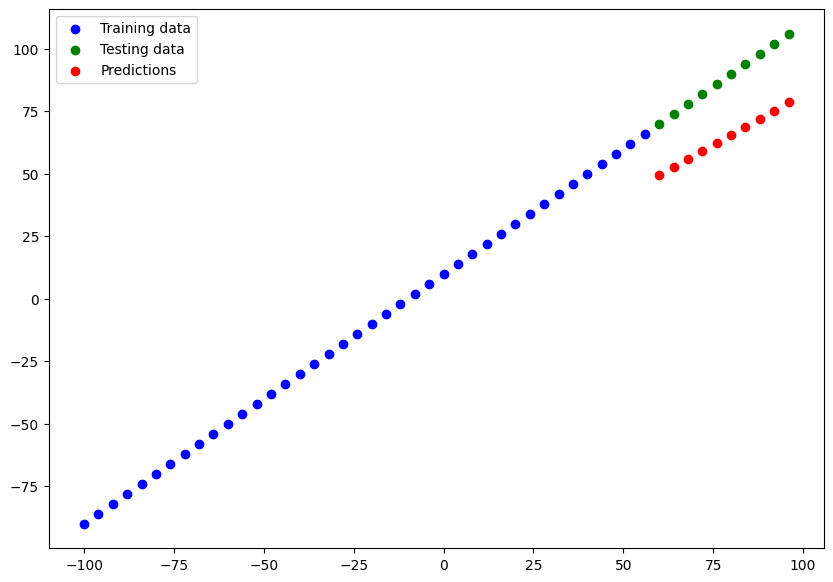

In [92]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

2 main metrics:

* MAE (Mean Absolute Error) - which is described as "on average, how wrong is each of my model's predictions"
* MSE (Mean Square Error) - which is described as "square the average errors"

In [93]:
# evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 23.9425 - mae: 23.9425


[23.942516326904297, 23.942516326904297]

In [94]:
# Calculate the mean absolute error
mea = tf.keras.metrics.MeanAbsoluteError()
mea.update_state(tf.reshape(y_test, (10, 1)), tf.constant(y_preds))
# Or mea.update_state(y_test, tf.squeeze(y_preds))
mea.result().numpy()

23.942516

In [95]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[49.59186 ],
       [52.806446],
       [56.02103 ],
       [59.23561 ],
       [62.45019 ],
       [65.66477 ],
       [68.87936 ],
       [72.09393 ],
       [75.30852 ],
       [78.5231  ]], dtype=float32)>

In [96]:
tf.reshape(y_test, (10, 1))

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [97]:
# Calculate mean square error
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, tf.squeeze(y_preds))
mse.result().numpy()


578.33344

In [98]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
    """
    Calculates the mean absolute error between y_true and y_pred.
    """
    mea = tf.keras.metrics.MeanAbsoluteError()
    mea.update_state(y_true, tf.squeeze(y_pred))
    return mea.result().numpy()

def mse(y_true, y_pred):
    """
    Calculates the mean squared error between y_true and y_pred.
    """
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(y_true, tf.squeeze(y_pred))
    return mse.result().numpy()

### Running experiment to improve our model

1. More data
2. Larger model
3. Train for longer

3 modeling experiment

1. `model_1`: 1 layer, trained for 100 epochs
2. `model_2`: 2 layer, trained for 100 epochs
3. `model_3`: 2 layer, trained for 500 epochs

example from tensorflow website:
```
import numpy as np

# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=3)
```

**Build `model_1`**

In [99]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.9150 - mae: 12.9150 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5316 - mae: 11.5316 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6687 - mae: 7.6687 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.0308 - mae: 12.0308
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1941 - mae: 8.1941 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8482 - mae: 8.8482 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7972 - mae: 7.7972
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7646 - mae: 10.7646 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6022 - mae: 7.6022
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9380 - mae: 11.9380 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1121 - mae: 8.1121 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6573 - mae: 8.6573
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


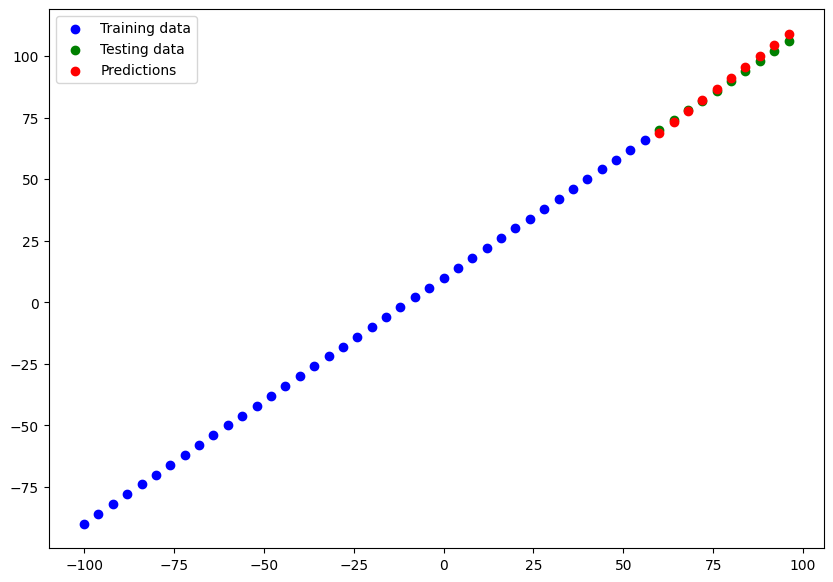

In [100]:
# make and plot predictions

y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [101]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(1.3972305, 2.8323338)

**Build `model_2`**
* 2 layers, 100 epochs

In [102]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.3139 - mae: 38.3139  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.6469 - mae: 29.6469 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.4346 - mae: 26.4346
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8473 - mae: 15.8473 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8852 - mae: 18.8852 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.8276 - mae: 12.8276 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.2430 - mae: 18.2430
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.6430 - mae: 13.6430 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.0704 - mae: 15.0704 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0274 - mae: 11.0274
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.8492 - mae: 14.8492
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9417 - mae: 10.9417
Epoch 13/100
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


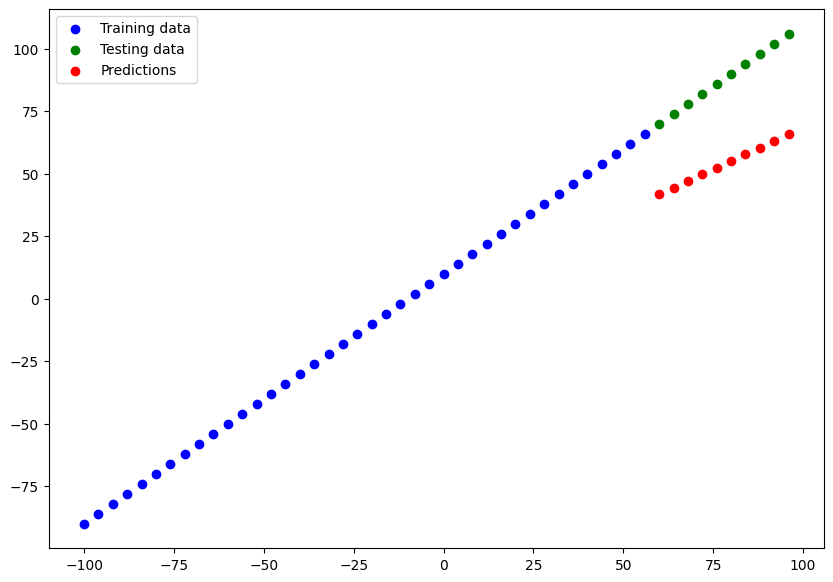

In [103]:
# Make and plots predictions of model_2

y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [104]:
# Caluculate model_2 evvaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(34.222496, 1185.6877)

**Build `model_2`**
* 2 layers, 500 epochs

In [105]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12.4711 - mae: 12.4711  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2615 - mae: 22.2615 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9055 - mae: 7.9055 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.0464 - mae: 21.0464
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3264 - mae: 18.3264 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.0586 - mae: 17.0586 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.6388 - mae: 16.6388
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6434 - mae: 11.6434 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.4094 - mae: 14.4094 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9078 - mae: 15.9078 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0081 - mae: 12.0081 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0218 - mae: 15.0218 
Epoch 13/500
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


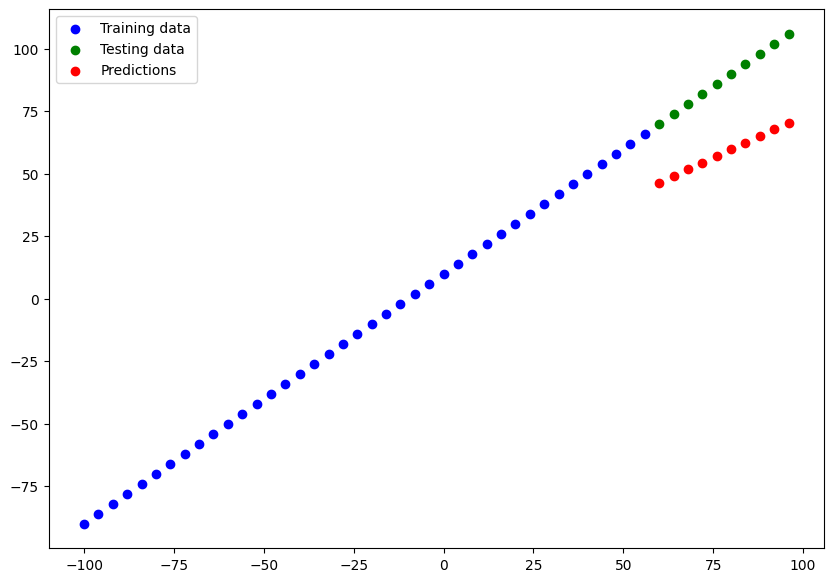

In [106]:
# Make and plots predictions of model_3

y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [107]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(29.525492, 886.4678)

### Comparing the results of our experiments

In [108]:
from ast import mod
# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.397231,2.832334
1,model_2,34.222496,1185.687744
2,model_3,29.525492,886.467773


Looks like `model_2` performed the best

### Tracking my experiments

Tools I can use:

* TensorBoard
* Weights & Biases

## Saving my models

To use model outside of google colab such as in webapp or mobile app

1. The SavedModel format
2. The HDF5 format

In [109]:
# Saving the model using SavedModel format
model_2.save("best_model_SavedModel_format.keras")

In [110]:
# Saving the model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved models

In [113]:
# Load in the SavedModels format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format.keras")

# Is the same?
loaded_SavedModel_format.summary(), model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(None, None)

In [114]:
# Compare model_2 predictions with SavedModel format model prediction
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [115]:
# Load in the .h5 format model

loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

# Is the same?
loaded_h5_model.summary(), model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(None, None)

In [116]:
# Compare model_2 predictions with .h5 format model prediction
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [117]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [119]:
# Create X and Y values

x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [120]:
# Create training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [121]:
# Build a neural network

tf.random.set_seed(42)

insurrance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurrance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

insurrance_model.fit(x_train_tensor, y_train_tensor, epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9919.8994 - mae: 9919.8994  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7629.8931 - mae: 7629.8931
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8008.3857 - mae: 8008.3857
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7358.3760 - mae: 7358.3760
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7263.5093 - mae: 7263.5093
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7466.6743 - mae: 7466.6743
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7643.8848 - mae: 7643.8848
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7657.0747 - mae: 7657.0747
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7565.9478 - mae: 7565.9478
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7496.6777 - mae: 7496.6777
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7377.6226 - mae: 7377.6226
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [122]:
# Check the results of the insurance model on the data

x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

insurrance_model.evaluate(x_test_tensor, y_test_tensor)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9403.8906 - mae: 9403.8906    


[9119.3642578125, 9119.3642578125]

### Lets improve the model!

In [123]:
# Set ramdom seed

tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
insurance_model_2.fit(x_train_tensor, y_train_tensor, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13286.8086 - mae: 13286.8086
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13162.2021 - mae: 13162.2021
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12911.1514 - mae: 12911.1514
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12385.2969 - mae: 12385.2969 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11426.8721 - mae: 11426.8721
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10034.5996 - mae: 10034.5996
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8563.2754 - mae: 8563.2754
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7614.6631 - mae: 7614.6631 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7410.6660 - mae: 7410.6660
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7375.7627 - mae: 7375.7627
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7353.2705 - mae: 7353.2705 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [124]:
# Evaluate the model
insurance_model_2.evaluate(x_test_tensor, y_test_tensor)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4806.3535 - mae: 4806.3535  


[4673.265625, 4673.265625]

In [125]:
# Set ramdom seed

tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
history = insurance_model_3.fit(x_train_tensor, y_train_tensor, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13283.7656 - mae: 13283.7656
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13104.5625 - mae: 13104.5625
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12749.4102 - mae: 12749.4102 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12045.1572 - mae: 12045.1572
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10869.4463 - mae: 10869.4463 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9382.7617 - mae: 9382.7617 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8058.4131 - mae: 8058.4131 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7476.1855 - mae: 7476.1855
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7392.5737 - mae: 7392.5737
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7367.0376 - mae: 7367.0376
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7344.5620 - mae: 7344.5620
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━

In [126]:
# Evaluate the model
insurance_model_3.evaluate(x_test_tensor, y_test_tensor)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3448.9700 - mae: 3448.9700  


[3385.2392578125, 3385.2392578125]

Text(0.5, 0, 'epochs')

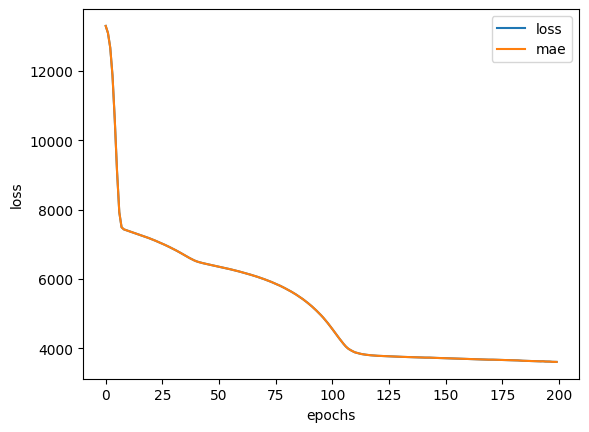

In [127]:
# Plot history (training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In [128]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

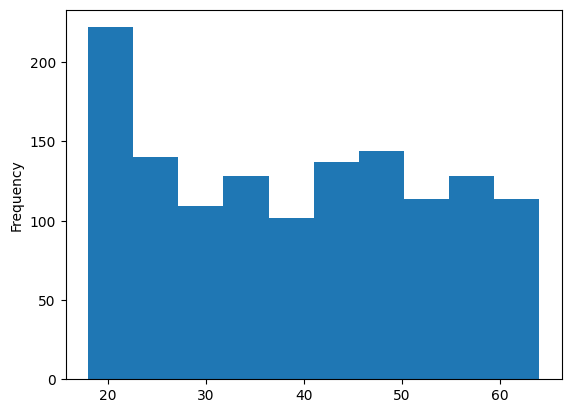

In [129]:
x["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

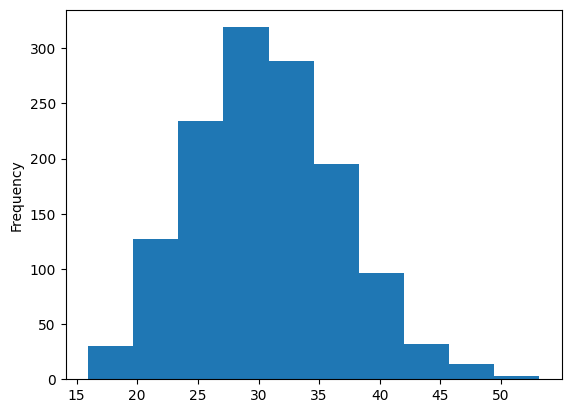

In [130]:
x["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

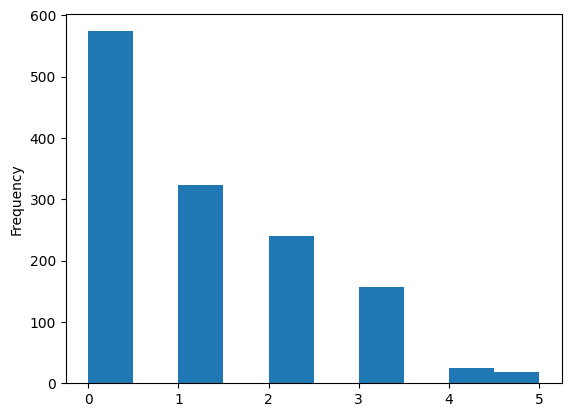

In [131]:
x["children"].plot(kind="hist")

In [145]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn those values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [135]:
# How does the data look like
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [136]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [137]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [151]:
# Build the neural network

insurrance_model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurrance_model_4.compile(loss = tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

insurrance_model_4.fit(x_train_normal, y_train, epochs=100 )


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.0830 - mae: 13297.0830
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13289.9727 - mae: 13289.9727 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13272.1221 - mae: 13272.1221 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13233.3643 - mae: 13233.3643 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13162.6133 - mae: 13162.6133
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13048.5410 - mae: 13048.5410 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12880.4502 - mae: 12880.4502 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12648.2715 - mae: 12648.2715 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12342.2256 - mae: 12342.2256
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11955.0674 - mae: 11955.0674 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11493.2070 - mae: 11493.2070 
Epoch 12/100
34/34 ━━━

In [156]:
# Evaluate our insurrance model trained on normalized data
insurrance_model_4.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3515.9646 - mae: 3515.9646 


[3429.865478515625, 3429.865478515625]